# Sobre os dados:

| Variavel | Especificação | Tipo |
|:---:|:---:|:---:|
| DATA | Data em que foi feita a avaliação. | Object |
| PREÇO | Preço do imovél em Reais | Object |
| ENDEREÇO | Endereço em que se encontra o imóvel | Object |
| ÁREAS | Área do imóvel em metro quadrado m² | Object |
| QUARTOS | Quantidade de quartos | Object |
| VAGAS DE ESTACIONAMENTO | Quantidade de vagas para veiculos | Object |
| BANHEIROS | Quantidade de banheiros no imóvel | Object |
| CONDOMÍNIO | Valor do condomínio em Reais | Object |
| IPTU | Valor do IPTU em R$ | Object |
| TIPO | Tipo do imóvel (Casa, Apartamento, ...) | Object |

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [3]:
imoveis = pd.read_csv('dados_imoveis.csv')
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            22110 non-null  object
 1   PRICE           22110 non-null  object
 2   ADDRESS         22107 non-null  object
 3   AREAS           22072 non-null  object
 4   BEDROOMS        20665 non-null  object
 5   PARKING-SPACES  19470 non-null  object
 6   BATHROOMS       20681 non-null  object
 7   CONDOMÍNIO      11358 non-null  object
 8   IPTU            6669 non-null   object
 9   TIPO            22110 non-null  object
dtypes: object(10)
memory usage: 1.7+ MB


In [4]:
imoveis

,DATE,PRICE,ADDRESS,AREAS,BEDROOMS,PARKING-SPACES,BATHROOMS,CONDOMÍNIO,IPTU,TIPO
0,2021-08-05 16:34:17.725797-03:00,Sob consulta,"Rua João de Abreu, Setor Oeste",222 - 485 m²,3 - 4,2 - 4,3 - 5,NaN,NaN,apartamentos
1,2021-08-05 16:34:17.726263-03:00,R$ 430.000,"Rua R 7, Setor Oeste",66 - 68 m²,2,2,2 - 3,NaN,NaN,apartamentos
2,2021-08-05 16:34:17.726628-03:00,R$ 345.000,"Rua 7, Setor Oeste",34 - 76 m²,1 - 2,1,1,NaN,NaN,apartamentos
3,2021-08-05 16:34:17.726966-03:00,R$ 420.000,"Setor Bueno, Goiânia",89 m²,3,1,2,NaN,NaN,apartamentos
4,2021-08-05 16:34:17.727328-03:00,R$ 1.018.000,"Setor Bueno, Goiânia",175 m²,4,5,4,R$ 650,R$ 2.000,apartamentos
...,...,...,...,...,...,...,...,...,...,...
22105,2021-08-05 16:45:57.314919-03:00,R$ 2.500.000,"Rua T 27, Setor Bueno",750 m²,NaN,NaN,NaN,NaN,NaN,terrenos-lotes-condominios
22106,2021-08-05 16:45:57.315271-03:00,R$ 200.000,"Rua do Buriti, Bairro Santa Rita",420 m²,NaN,NaN,NaN,NaN,NaN,terrenos-lotes-condominios
22107,2021-08-05 16:45:57.315586-03:00,R$ 1.700.000,"Rodovia GO-060, Chácaras Maringá",10000 m²,NaN,NaN,NaN,NaN,R$ 1.400,terrenos-lotes-condominios
22108,2021-08-05 16:45:57.315956-03:00,R$ 5.500.000,"Avenida Americano do Brasil, Parque Santa Rita",10314 m²,NaN,NaN,NaN,NaN,NaN,terrenos-lotes-condominios


In [8]:
imoveis = imoveis.drop(columns=['DATE', 'IPTU', 'ADDRESS'])

In [10]:
imoveis = imoveis.drop_duplicates()

In [12]:
imoveis = imoveis .dropna()
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5653 entries, 4 to 20667
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PRICE           5653 non-null   object
 1   AREAS           5653 non-null   object
 2   BEDROOMS        5653 non-null   object
 3   PARKING-SPACES  5653 non-null   object
 4   BATHROOMS       5653 non-null   object
 5   CONDOMÍNIO      5653 non-null   object
 6   TIPO            5653 non-null   object
dtypes: object(7)
memory usage: 353.3+ KB


In [14]:
def transform_float(valor):
    return float(valor.replace('R$', '').replace(' ', '').replace(',', '.').replace('.', ''))
def transform_area(valor):
    return int(valor.replace('m²', '').replace(' ', ''))
def trnsform_int(valor):
    return int(valor)

imoveis['PRICE'] = imoveis['PRICE'].apply(transform_float)
imoveis['CONDOMÍNIO'] = imoveis['CONDOMÍNIO'].apply(transform_float)
imoveis['BEDROOMS'] = imoveis['BEDROOMS'].apply(trnsform_int)
imoveis['PARKING-SPACES'] = imoveis['PARKING-SPACES'].apply(trnsform_int)
imoveis['BATHROOMS'] = imoveis['BATHROOMS'].apply(trnsform_int)
imoveis['AREAS'] = imoveis['AREAS'].apply(transform_area)
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5653 entries, 4 to 20667
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRICE           5653 non-null   float64
 1   AREAS           5653 non-null   int64  
 2   BEDROOMS        5653 non-null   int64  
 3   PARKING-SPACES  5653 non-null   int64  
 4   BATHROOMS       5653 non-null   int64  
 5   CONDOMÍNIO      5653 non-null   float64
 6   TIPO            5653 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 353.3+ KB


In [16]:
imoveis = imoveis.drop(columns=['TIPO', 'CONDOMÍNIO', 'PARKING-SPACES'])

In [18]:
imoveis = pd.get_dummies(imoveis, drop_first=True).astype(int)

In [20]:
imoveis.head()

,PRICE,AREAS,BEDROOMS,BATHROOMS
4,1018000,175,4,4
5,985000,140,2,3
6,235000,64,2,2
7,355000,84,3,2
8,365000,64,2,2


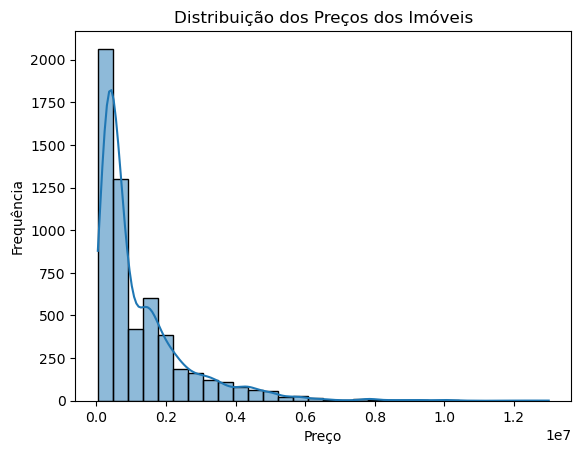

In [22]:
sns.histplot(imoveis['PRICE'], bins=30, kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

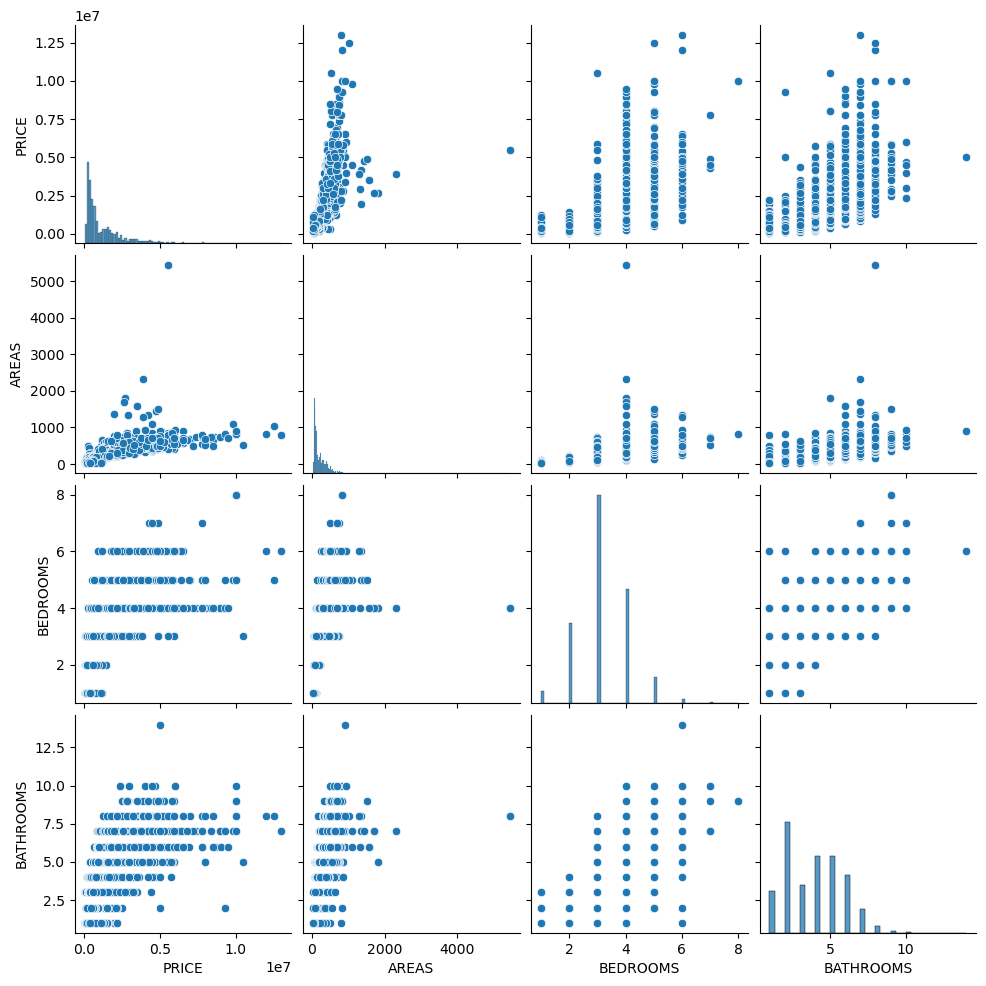

In [24]:
sns.pairplot(imoveis[['PRICE', 'AREAS', 'BEDROOMS', 'BATHROOMS']])
plt.show()

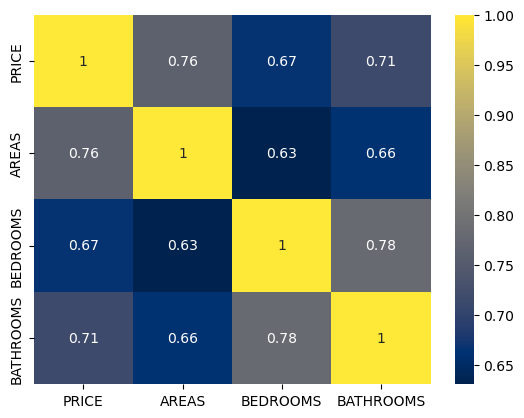

In [26]:
correlacao = imoveis.corr()
sns.heatmap(correlacao, annot=True, cmap='cividis')
cmap = sns.diverging_palette(h_neg=425, h_pos=322, as_cmap=True, sep=60, center='light')
plt.show()

In [28]:
y = imoveis.PRICE
X = imoveis.drop(columns='PRICE')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=45)

In [30]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred

array([ 151294.38870329,  917363.101197  , 2167830.30159147, ...,
        165884.70460392, 1516943.36420959,  764246.50474354])

In [32]:
y_pred = modelo.predict(X_test)

In [34]:
print('MAE', mean_absolute_error(y_test, y_pred))
print('MSE', mean_squared_error(y_test, y_pred))
print('R²', r2_score(y_test, y_pred))

MAE 435705.0863213114
MSE 544032434544.82056
R² 0.6992263286557584
